## Classification with Logistic Regression
The following example shows how Logistic Regression algorithms are used for classification. 
Business challenge: Identify customers who might stop doing business with a company, i.e. predict customer churn.
Data: Sample data describing customer churn for a telecommunications company.
Data Source: IBM, https://www.kaggle.com/blastchar/telco-customer-churn
For guidance, different analysis steps are indicated below. Please add the corresponding coding to obtain a running notebook.
If necessary, consult documentation pages, e.g. 
-	pandas API reference: https://pandas.pydata.org/pandas-docs/stable/reference/index.html
-	pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
-	pandas Series: https://pandas.pydata.org/pandas-docs/stable/reference/series.html
-	seaborn: https://seaborn.pydata.org/api.html
-	SciKit: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

## 1. Import libraries for
-	data structures and data analysis tools (pandas)
-	general visualization (matplotlib)
-	statistical graphics (seaborn – based on matplotlib)

In [2]:
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import the data as a DataFrame
-	Read the data from a CSV file into a DataFrame (panda.read_csv)
-	Display the first 10 lines for the DataFrame (DataFrame.head)

In [3]:
#import of the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#example output of the dataframe "data"
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## 3. Explore the basic properties of the data
-	Print a summary of the data including e.g. data types and non-null values (DataFrame.info)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 4. Transform data to appropriate numeric values
-	Total Charges: object to float (panda.to_numeric)
-	Are there missing values? (DataFrame.loc, DataFrame.isna)
-	How do you want to handle them? Insert reasonable values.
-	View the different values of other columns with nonnumerical values and replace them by appropriate numerical ones (Series.unique, Series.replace)
E.g. OnlineBackup: ‘No', 'Yes', 'No internet service' -> 0, 1, 0

Note: Selecting a column from a DataFrame yields a Series (print.type(DataFrame[‘X’])). Show this by print(type(DataFrame[‘some column’])).
(https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html)

In [5]:
#values of the row "TotalCharges" are transformed into float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
#all columns of the dataframe where the value of "TotalCharges" is null are displayed
data.loc[data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
#each column of "TotalCharges" will be set to "0" if there is no value set.
data[data['TotalCharges'].isna()==True] = 0
#returning every unique value of the column "OnlineBackup"
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service', 0], dtype=object)

In [7]:
#replacing nonnumerical values with numeric values which allows the algorithm to deal with them
# No = 0,   Yes = 1, No internet service = 0
# inplace=true replaces the value in place
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)


## 5. Remove, data / attributes which are certainly not relevant for a logistic regression model 
-	Remove CustomerID (DataFrame.pop)
-	Check the resulting DataFrame for object data types (DataFrame.info)

In [8]:
data.pop('customerID') # drops the column "customerID" from the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


## 6. Eliminate multicollinearity between explanatory variables.
-	Evaluate correlations between explanatory variables (DataFrame.corr)
-	Display correlations through a heatmap (sns.heatmap)

use matplotlib.pyplot to display properly, e.g.

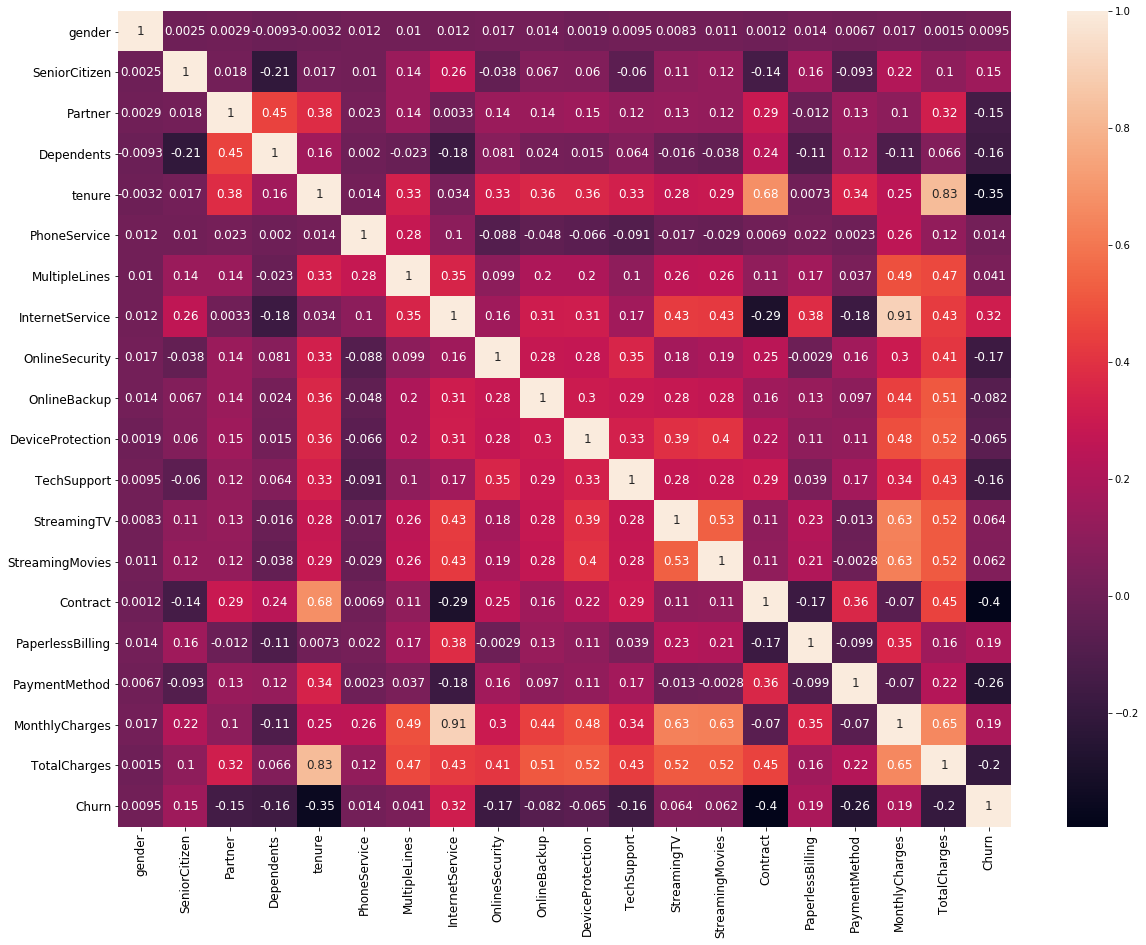

In [9]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf() # get plot figure object
heat_map.set_size_inches(20,15) #size it
plt.xticks(fontsize=12) #font size of axis labeling
plt.yticks(fontsize=12)
plt.show() # draw the plot

In [10]:
data.pop('TotalCharges') #drops the column "TotalCharges" from the dataframe

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

- If we want to know which features does our churned values hast, we can group them and get the average values of each of the features

In [11]:
data.groupby('Churn').mean()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
Churn,,,,,,,,,,,,,,,,,,
0,0.491689,0.128721,0.526479,0.342675,37.569965,0.899304,0.409161,1.073637,0.332431,0.367607,0.362002,0.334364,0.365095,0.369733,0.885195,0.534983,1.494202,61.177068
1,0.502408,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,1.633494,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,0.140182,0.749064,0.813269,74.441332


## 7. Prepare test and trainings data sets.
-	Import package (train_test_split) from SciKit (sklearn.model.selection) for the generation of training and test data
-	Generate training and test data with ratio 5:1 (train_test_split)
-	Prepare trainings and test data: DataFrame with target values, e.g. train_y (DataFrame[‘Target Variable’]); DataFrame without target variable, e.g. train_x (DataFrame.pop)

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)
 
train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

2152    0
4286    0
5138    0
2473    0
5809    0
       ..
1265    0
980     0
4699    0
2603    0
3651    0
Name: Churn, Length: 1409, dtype: int64

-	Check, if there is a large imbalance in the training data between customer who churn and the ones who don’t. Use e.g.

In [13]:
print(data['Churn'].value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


- there is a different in the number of data between a churned and a non-churned costumer. we will continue without resampling and check in a later example if the resampling gives us better results

- We use a Standard Scaler to our train data so if there variables with large ranges,it will have a standardized coefficients(in a limited Range) after scaling 
 https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

- we only used fit at the train data and transform directly at our test data !

## 8. Create a Logistic Regression model.
-	Import package from SciKit (sklearn) 
-	create the Model and save it as a Classifier
-	Fit each the classifier to the training data (fit)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 9. Run the  model using the test and trainings data.
-	Run the model and create the new predicted values (pred_y)
-	print a classification report to show us how accuarte our Model is


In [16]:
pred_y = classifier.predict(test_x)


In [17]:
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score
print(" Confusion matrix and the classification report for our Testdata ")
print(confusion_matrix(test_y,pred_y))  
print(classification_report(test_y,pred_y)) 

 Confusion matrix and the classification report for our Testdata 
[[936  97]
 [160 216]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.69      0.57      0.63       376

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



- and now lets compare it with the decison tree calssifier and see the difference

In [18]:
from sklearn import tree
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)
decisionTree = decisionTree.fit(X=train_x, y=train_y)

In [19]:
#train set pruned
#predicting values for training data "train_x"
train_pred_y_dt = decisionTree.predict(train_x) 

#test set pruned
#predicting values for test data "test_x"
test_pred_y_dt = decisionTree.predict(test_x) 

In [20]:

#-------------------test set pruned------------------------------------
print("-- pruned decision tree - testdata --")
print(confusion_matrix(test_y, test_pred_y_dt))  
print(classification_report(test_y, test_pred_y_dt)) 

-- pruned decision tree - testdata --
[[931 102]
 [182 194]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.52      0.58       376

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



- as we see here that the logistic regression classifier gives us slightly better preformance than the decision Tree

In [21]:
print(train_y.value_counts().sum())

5634


In [22]:
print(test_y.value_counts().sum())

1409


## 10. Tuning the logistic regression Model.
-	re-Run the model with different parameters 
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
-	compare the difference
-   C= it's a value that we can pecify to control the regulation of our model : smaller C specify stronger regularization.
-   penalty = different technichs to tune the regulazation of the model : A regression model that uses L1 regularization           technique is called Lasso Regression and model which uses L2 is called Ridge Regression.
    https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c  
-   Solver : mathematical methods that are used to solve our models and they might give us different accuracy/percision values     For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
-   more about solvers : https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
-   RandomState: Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data.
-   max_iter :Maximum number of iterations taken in order to converge (to have a value around the final value with the minimum     error)
-   Tol: Tolerance for stopping criteria (stopping the iteration when it achieves the tolerance value)

In [23]:
classifier = LogisticRegression(C=0.001)
classifier.fit(train_x, train_y)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
pred_y = classifier.predict(test_x)

In [25]:
print(" testdata Confusion matrix and the classification report")
print(confusion_matrix(test_y,pred_y))  
print(classification_report(test_y,pred_y))

 testdata Confusion matrix and the classification report
[[1002   31]
 [ 262  114]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1033
           1       0.79      0.30      0.44       376

    accuracy                           0.79      1409
   macro avg       0.79      0.64      0.66      1409
weighted avg       0.79      0.79      0.76      1409



In [26]:
classifier = LogisticRegression(C=0.1)
classifier.fit(train_x, train_y)
pred_y = classifier.predict(test_x)
print(" testdata Confusion matrix and the classification report")
print(confusion_matrix(test_y,pred_y))  
print(classification_report(test_y,pred_y))

 testdata Confusion matrix and the classification report
[[936  97]
 [166 210]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.68      0.56      0.61       376

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



- a higher C value gave us better overall accuracy 

In [27]:
classifier = LogisticRegression(C=1,tol=0.01,max_iter=100,solver="saga",random_state=3)
classifier.fit(train_x, train_y)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [28]:

pred_y = classifier.predict(test_x)
print(" testdata Confusion matrix and the classification report")
print(confusion_matrix(test_y,pred_y))  
print(classification_report(test_y,pred_y))

 testdata Confusion matrix and the classification report
[[936  97]
 [160 216]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.69      0.57      0.63       376

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



- as we see that some small changes gave us a better or worse accuracy. but how we find the best parameters to our classifier ? well Grid search is a strong tool of finding the optimal parameters because it train and test every possible combination that we allow
- CAUTION: it might take longer time for the Computer to procces it (if it takes too long you can click interrupt at the kernel menu)
https://scikitlearn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV


param_grid = {
           'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'penalty': ['l1', 'l2'],
           'solver': [ 'liblinear', 'saga']}

clf = GridSearchCV(LogisticRegression(random_state=3,max_iter=10000), param_grid,scoring = 'accuracy',cv = 10,verbose=True, n_jobs=-1)

In [30]:
clf.fit(train_x, train_y)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   32.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=3, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=True)

In [31]:
pred_y = clf.predict(test_x)
best_accuracy = clf.best_score_
best_parameters = clf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print(" testdata Confusion matrix and the classification report")
print(confusion_matrix(test_y,pred_y))  
print(classification_report(test_y,pred_y))

Best Accuracy: 80.16 %
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
 testdata Confusion matrix and the classification report
[[943  90]
 [180 196]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.69      0.52      0.59       376

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## 11. creating and exporting a subset of the Data
- So lets play a little bit with our dataframe : we will create a sub set include only male data with the double of the           MonthlyCharges column
- The exported Dataset will be saved as "DataMale"
- Its important to have the subset as a copy (.copy (deep=True)) so you will be able to modify it as you like and not have any    copy warnings : https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [32]:
DataMale= data.loc[data['gender'] == 0].copy(deep=True)
DataMale["MonthlyCharges"] =  DataMale["MonthlyCharges"]*2
DataMale.pop('gender')

1       0
2       0
3       0
6       0
9       0
       ..
7033    0
7035    0
7038    0
7041    0
7042    0
Name: gender, Length: 3560, dtype: int64

In [33]:
DataMale.groupby('Churn').mean()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
Churn,,,,,,,,,,,,,,,,,
0,0.128517,0.517110,0.347909,37.218631,0.896578,0.398479,1.069202,0.326236,0.358935,0.357795,0.331179,0.357414,0.361217,0.874905,0.525475,1.499620,121.390951
1,0.253763,0.376344,0.173118,18.963441,0.903226,0.466667,1.619355,0.143011,0.277419,0.298925,0.155914,0.443011,0.441935,0.153763,0.753763,0.758065,148.133978


- we will export the dataframe and save it under "DataMale_Subset".

In [34]:
#now we will export our new Dataframe
DataMale.to_csv(r'DataMale_Subset.csv', index = False)

##   Exporting the logistic regression Model that we already created it
- Therefore we will use for this the pickle library  https://stackabuse.com/scikit-learn-save-and-restore-models/
- There is also an alternative library "Joblib" that do the same job 

In [35]:
import pickle
# save the model 
filename = 'logistic_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

- We can import our Module anytime using the "pickle.load" function  :

In [36]:
# load the model from disk
logistic_model = pickle.load(open(filename, 'rb'))

## 12. excuting the logistic regression at the new sub set using the orginal and the Re-sampled Data and compare between both of them
- therefore we will read our sub data and do a logisic regression twice. once with the normal data and once with the resampled data 

In [37]:
df = pd.read_csv('DataMale_Subset.csv')
#example output of the dataframe "data"
df.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,113.9,0
1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,107.7,1
2,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,84.6,0
3,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,3,178.2,0
4,0,0,1,62,1,0,1,1,1,0,0,0,0,1,0,2,112.3,0
5,0,1,1,13,1,0,1,1,0,0,0,0,0,0,1,1,99.9,0
6,0,0,0,16,1,0,0,0,0,0,0,0,0,2,0,3,37.9,0
7,0,1,0,58,1,1,2,0,0,1,0,1,1,1,0,3,200.7,0
8,0,0,0,49,1,1,2,0,1,1,0,1,1,0,1,2,207.4,1
9,0,0,0,25,1,0,2,1,0,1,1,1,1,0,1,0,211.0,0


In [38]:
#prepare test and training Data
train, test = train_test_split(df, test_size = 0.2)
 
train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

1298    1
1802    1
42      0
2189    0
1041    1
       ..
2914    0
304     0
2474    0
2887    0
2263    1
Name: Churn, Length: 712, dtype: int64

In [39]:
print(df['Churn'].value_counts())

0    2630
1     930
Name: Churn, dtype: int64


In [40]:
#scaling :
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [41]:
# load the model from disk
logistic_model = pickle.load(open(filename, 'rb'))
logistic_model.fit(train_x, train_y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [42]:
pred_y = logistic_model.predict(test_x)

In [43]:
print(" testdata Confusion matrix and the classification report")
print(confusion_matrix(test_y,pred_y))  
print(classification_report(test_y,pred_y)) 
accuracy_score(test_y, pred_y)

 testdata Confusion matrix and the classification report
[[467  49]
 [ 86 110]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       516
           1       0.69      0.56      0.62       196

    accuracy                           0.81       712
   macro avg       0.77      0.73      0.75       712
weighted avg       0.80      0.81      0.80       712



0.8103932584269663

-	Import package for resampling (resample) from SciKit for resampling (sklearn.untils)
-	Resample, such that there is a similar number of datasets for churn and non-churn (resample)
-	Check, if resampling worked.

In [45]:
from sklearn.utils import resample

#now lets redo it with resempling the Data
df_majority = df[df['Churn']==0] #all columns where the value of the row "Churn" is "0"
df_minority = df[df['Churn']==1] #all columns where the value of the row "Churn" is "1"

print(df_majority['Churn'].value_counts()) #print the amount of datasets
print(df_minority['Churn'].value_counts())

df_minority_upsampled = resample(df_minority,
replace=True,
n_samples=2630, #same number of samples as majority class
random_state=1) #set the seed for random resampling
# Combine resampled results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df['Churn'].value_counts()) #amount of datasets pre resampling
print(df_upsampled['Churn'].value_counts()) #amount of datasets post resampling

0    2630
Name: Churn, dtype: int64
1    930
Name: Churn, dtype: int64
0    2630
1     930
Name: Churn, dtype: int64
1    2630
0    2630
Name: Churn, dtype: int64


- we have now a balance in the training data between customer who churn and the ones who are not.
- now let's excute our module one more time with the new data

In [46]:
train, test = train_test_split(df_upsampled, test_size = 0.2)
 
train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

1925    1
1227    1
1393    1
2492    1
2396    1
       ..
232     1
1880    1
1171    1
1968    1
2117    1
Name: Churn, Length: 1052, dtype: int64

In [47]:
#scaling :
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [48]:
# load the model from disk
logistic_model = pickle.load(open(filename, 'rb'))
logistic_model.fit(train_x, train_y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [49]:
pred_y = logistic_model.predict(test_x)

In [50]:
print(" testdata Confusion matrix and the classification report")
print(confusion_matrix(test_y,pred_y))  
print(classification_report(test_y,pred_y)) 
accuracy_score(test_y, pred_y)

 testdata Confusion matrix and the classification report
[[383 152]
 [111 406]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       535
           1       0.73      0.79      0.76       517

    accuracy                           0.75      1052
   macro avg       0.75      0.75      0.75      1052
weighted avg       0.75      0.75      0.75      1052



0.75

 
- so after resampling we came to the conclution that without resampling we had a better accuracy but with a resampling we accompliched fair precesion of both values "churned and not churned"


## Using the ROC to evalute the Module
- An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds
- True Positive Rate (TPR) is a synonym for recall and its the number of true positiv values divided by the sum of true postive and false negative values
- False Positive Rate (FPR) : is the number of false positiv values divided by the sum of false postive and true negative   values
- the best value on the Graph is wenn we have a TPR near to one and the smalles popssible FPR 
- AUC (Area under the ROC Curve): measures the whole area under the curve. the nearest value to 1 indicates to a better preformance
- The desion function tells us on which side of the hyperplane generated by the classifier we are (and how far we are away from it). Based on that information. based on this information we can draw our ROC and get the AUC value to evaluate our module ! 
- more information about ROC :https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

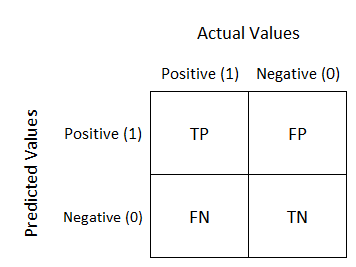

In [51]:
y_pred_logistic = logistic_model.decision_function(test_x)

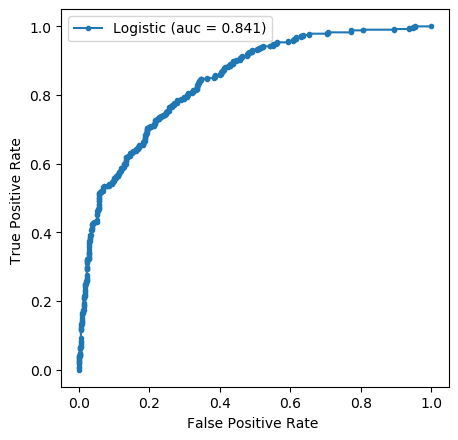

In [52]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(test_y, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')

plt.legend()

plt.show()


## 13. using different classifiers at our resampled sub-set and decide which one is the best option (Using ROC curve)
- we will use the folowing classifiers (naiv bais . decision tree, random forest, logistic regression )

- we will start with the decision tree classifier
- The desion function tells us on which side of the hyperplane generated by the classifier we are (and how far we are away from   it). Based on that information, the estimator then label the examples with the corresponding label. Alternatively we can also use the "Predict_proba" function that deliver us the probebilities 

In [53]:
from sklearn import tree
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)
decisionTree = decisionTree.fit(X=train_x, y=train_y)

In [54]:
#train set pruned
#predicting values for training data "train_x"
train_pred_y_tree = decisionTree.predict(train_x) 

#test set pruned
#predicting values for test data "test_x"
test_pred_y_tree = decisionTree.predict(test_x)

In [55]:
y_pred_tree = decisionTree.predict_proba(test_x)

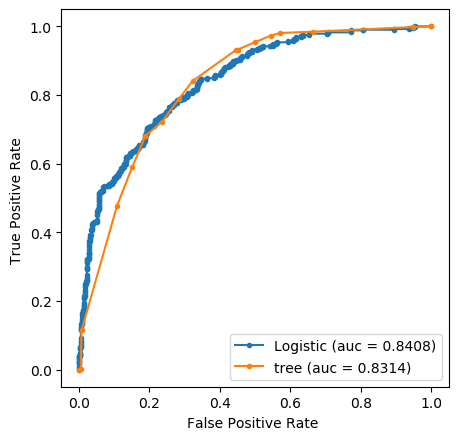

In [56]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(test_y, y_pred_logistic)
tree_fpr, tree_tpr, tree_threshold = roc_curve(test_y, y_pred_tree[:,1])
auc_logistic = auc(logistic_fpr, logistic_tpr)
auc_tree = auc(tree_fpr, tree_tpr)
plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.4f)' % auc_logistic)
plt.plot(tree_fpr, tree_tpr, marker='.', label='tree (auc = %0.4f)' % auc_tree)

plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')

plt.legend()

plt.show()


- now lets do our naivbais classifier :https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

In [57]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(train_x,train_y)

#Predict the response for test dataset
y_pred_nb = gnb.predict(test_x)

In [58]:
y_pred_nb = gnb.predict_proba(test_x)

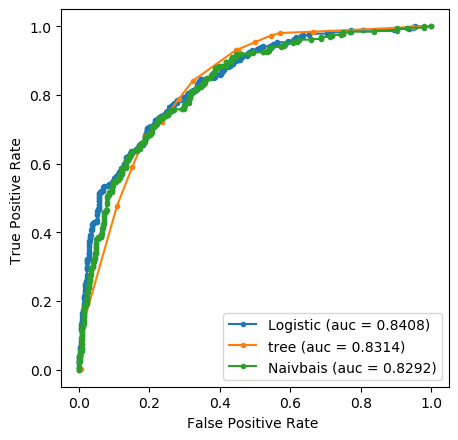

In [59]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(test_y, y_pred_logistic)
tree_fpr, tree_tpr, tree_threshold = roc_curve(test_y, y_pred_tree[:,1])
nb_fpr, nb_tpr, nb_threshold = roc_curve(test_y, y_pred_nb[:,1])
auc_logistic = auc(logistic_fpr, logistic_tpr)
auc_tree = auc(tree_fpr, tree_tpr)
auc_nb= auc(nb_fpr, nb_tpr)
plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.4f)' % auc_logistic)
plt.plot(tree_fpr, tree_tpr, marker='.', label='tree (auc = %0.4f)' % auc_tree)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naivbais (auc = %0.4f)' % auc_nb)

plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')

plt.legend()

plt.show()


- as we can see we got by far almost the same result! 

- lets see what the random forest classifier would tell us
https://www.datacamp.com/community/tutorials/random-forests-classifier-python 

In [60]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_x,train_y)

y_pred_rf=clf.predict(test_x)

In [61]:
y_pred_rf = clf.predict_proba(test_x)

- we will  use at the end our Artificial neural network (ANN) with the help of the multi-layer perceptron (MLP) algorithm to clasify and compare the results with the other classifiers
-https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [62]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(max_iter=1000)

ann.fit(train_x,train_y)
y_pred_ann=ann.predict(test_x)

In [63]:
y_pred_ann = ann.predict_proba(test_x)

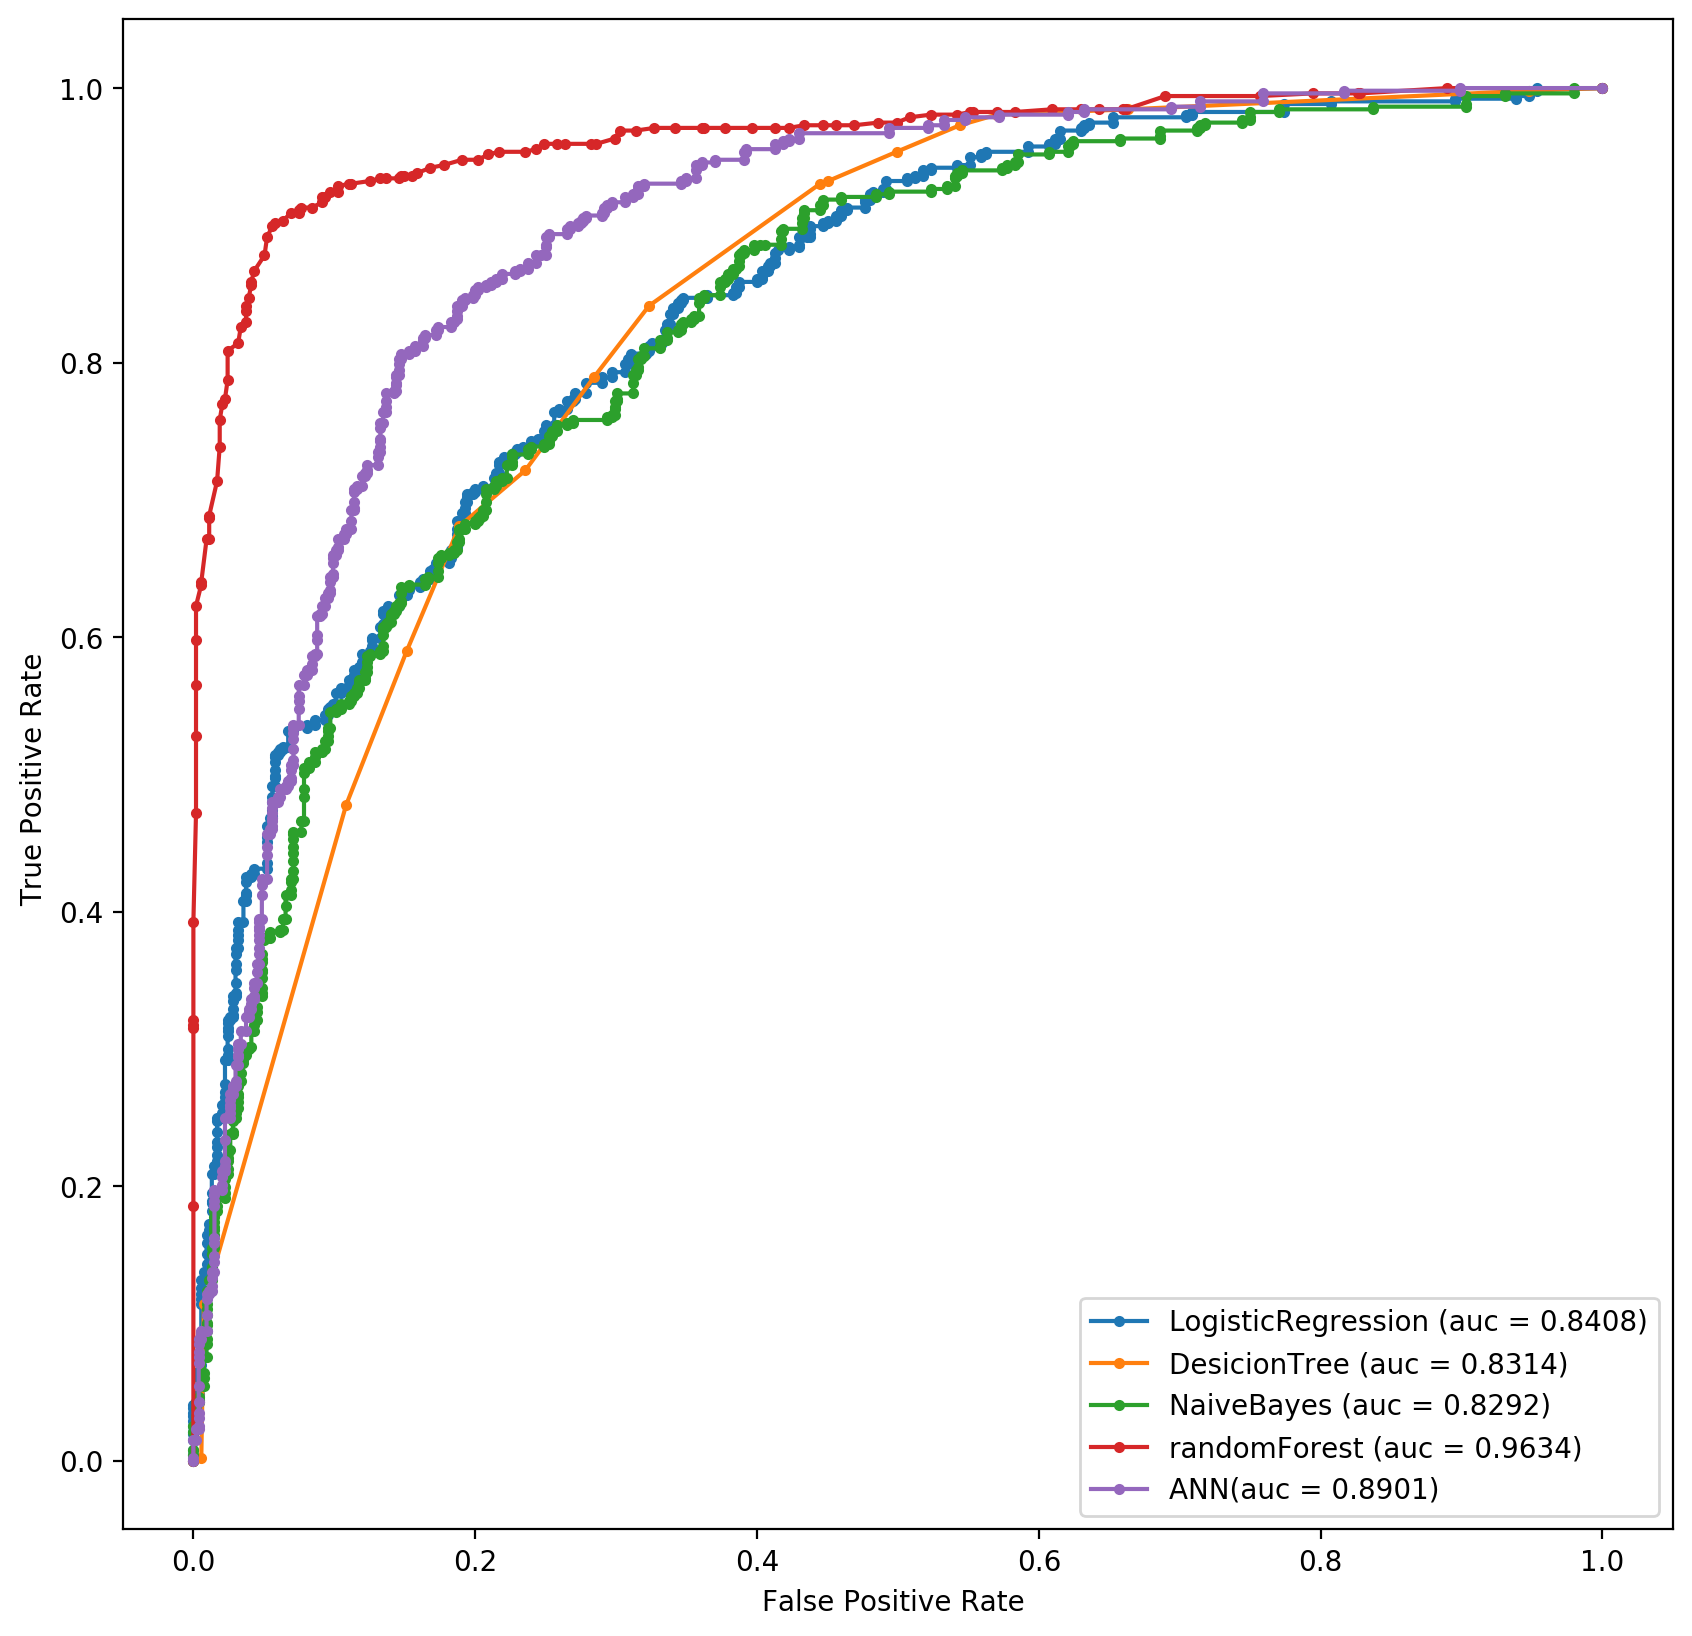

In [64]:
logistic_fpr, logistic_tpr, threshold = roc_curve(test_y, y_pred_logistic)
tree_fpr, tree_tpr, tree_threshold = roc_curve(test_y, y_pred_tree[:,1])
nb_fpr, nb_tpr, nb_threshold = roc_curve(test_y, y_pred_nb[:,1])
rf_fpr, rf_tpr, rf_threshold = roc_curve(test_y, y_pred_rf[:,1])
ann_fpr, ann_tpr, ann_threshold = roc_curve(test_y, y_pred_ann[:,1])



auc_logistic = auc(logistic_fpr, logistic_tpr)
auc_tree = auc(tree_fpr, tree_tpr)
auc_nb= auc(nb_fpr, nb_tpr)
auc_rf= auc(rf_fpr, rf_tpr)
auc_ann= auc(ann_fpr, ann_tpr)

plt.figure(figsize=(10, 10), dpi=200)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='LogisticRegression (auc = %0.4f)' % auc_logistic)
plt.plot(tree_fpr, tree_tpr, marker='.', label='DesicionTree (auc = %0.4f)' % auc_tree)
plt.plot(nb_fpr, nb_tpr, marker='.', label='NaiveBayes (auc = %0.4f)' % auc_nb)
plt.plot(rf_fpr, rf_tpr, marker='.', label='randomForest (auc = %0.4f)' % auc_rf)
plt.plot(ann_fpr, ann_tpr, marker='.', label='ANN(auc = %0.4f)' % auc_ann)


plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')

plt.legend()

plt.show()


- The best classifier according to the Roc is our Random Forest which has an AUC(Area Under Curve) near to 1 

- Lets take a deeper look at the results of the random forest calssification 

In [65]:
y_pred_rf=clf.predict(test_x)

In [67]:
print(" testdata Confusion matrix and the classification report")
print(confusion_matrix(test_y,y_pred_rf))  
print(classification_report(test_y,y_pred_rf)) 

 testdata Confusion matrix and the classification report
[[457  78]
 [ 34 483]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       535
           1       0.86      0.93      0.90       517

    accuracy                           0.89      1052
   macro avg       0.90      0.89      0.89      1052
weighted avg       0.90      0.89      0.89      1052



## 13. Using different scalers from the Logistig regression and decide which one could be the            best option (Using ROC curve)

- MinMaxScaler
-To normalize your data, you need to import the MinMaxScalar from the sklearn library and apply it to our dataset. So, let’s do that!
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/


In [68]:


# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
ns = MinMaxScaler().fit(train_x)

# transform training data
train_x_ns = ns.transform(train_x)

# transform testing dataabs
test_x_ns = ns.transform(test_x)

In [69]:
pred_y_ns = logistic_model.predict(test_x_ns)

In [78]:
print(" testdata Confusion matrix and the classification report")
print(confusion_matrix(test_y,pred_y_ns))  
print(classification_report(test_y,pred_y_ns)) 

 testdata Confusion matrix and the classification report
[[380 155]
 [108 409]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       535
           1       0.73      0.79      0.76       517

    accuracy                           0.75      1052
   macro avg       0.75      0.75      0.75      1052
weighted avg       0.75      0.75      0.75      1052



In [71]:
y_pred_logistic_ns = logistic_model.decision_function(test_x_ns)

- we will also use the robust scaler to compare it with the other two 

In [72]:
# data normalization with sklearn
from sklearn.preprocessing import RobustScaler

# fit scaler on training data
rs = RobustScaler().fit(train_x)

# transform training data
train_x_rs = rs.transform(train_x)

# transform testing dataabs
test_x_rs = rs.transform(test_x)

In [73]:
pred_y_rs = logistic_model.predict(test_x_rs)

In [77]:
print(" testdata Confusion matrix and the classification report")
print(confusion_matrix(test_y,pred_y_rs))  
print(classification_report(test_y,pred_y_rs)) 


 testdata Confusion matrix and the classification report
[[504  31]
 [264 253]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.77       535
           1       0.89      0.49      0.63       517

    accuracy                           0.72      1052
   macro avg       0.77      0.72      0.70      1052
weighted avg       0.77      0.72      0.70      1052



In [75]:
y_pred_logistic_rs = logistic_model.decision_function(test_x_rs)

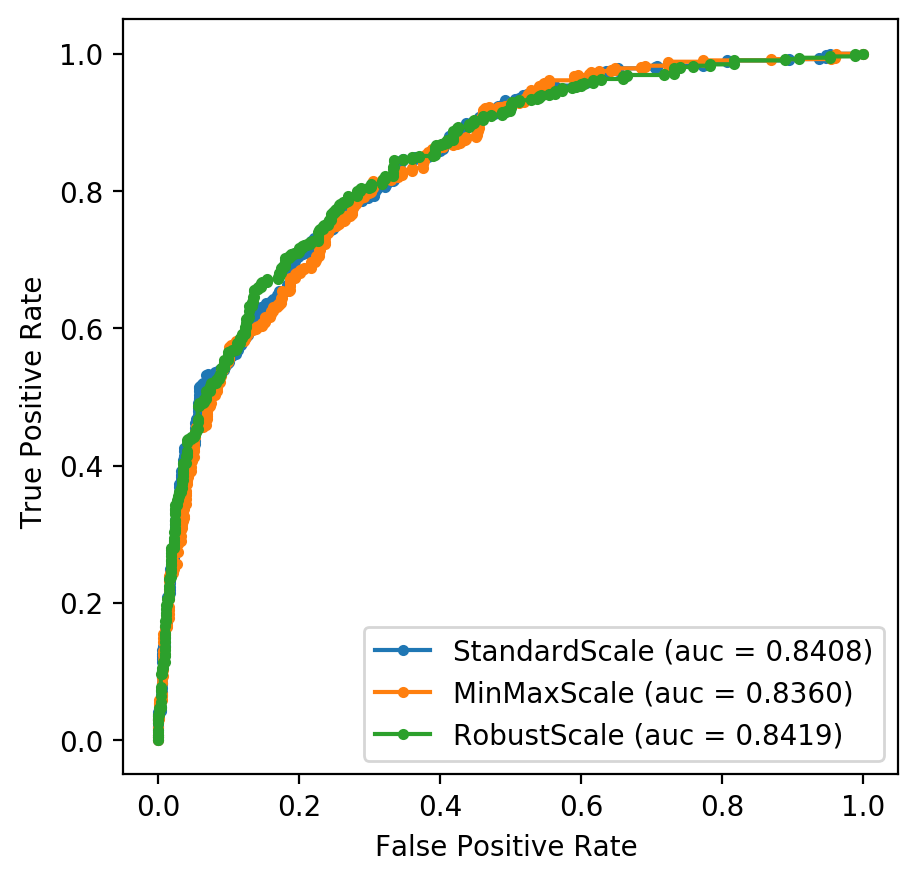

In [76]:
logistic_fpr, logistic_tpr, threshold = roc_curve(test_y, y_pred_logistic)
logistic_ns_fpr, logistic_ns_tpr, threshold_ns = roc_curve(test_y, y_pred_logistic_ns)
logistic_rs_fpr, logistic_rs_tpr, threshold_rs = roc_curve(test_y, y_pred_logistic_rs)

auc_logistic = auc(logistic_fpr, logistic_tpr)
auc_logistic_ns = auc(logistic_ns_fpr, logistic_ns_tpr)
auc_logistic_rs = auc(logistic_rs_fpr, logistic_rs_tpr)


plt.figure(figsize=(5, 5), dpi=200)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='StandardScale (auc = %0.4f)' % auc_logistic)
plt.plot(logistic_ns_fpr, logistic_ns_tpr, marker='.', label='MinMaxScale (auc = %0.4f)' % auc_logistic_ns)
plt.plot(logistic_rs_fpr, logistic_rs_tpr, marker='.', label='RobustScale (auc = %0.4f)' % auc_logistic_rs)

plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')

plt.legend()

plt.show()

- this plot shows us that our scaler choise in this case don't remarkably affect the AUC values
- other kinds of scalers to try : https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35 